In [36]:
#Dependencies
from matplotlib import pyplot as plt
import pandas as pd
#import requests
import json
import datetime
#from config import api_key
import scipy.stats as stats
from scipy.stats import linregress

In [37]:
project_data_set_path = "C:Resources/FullDataSet.csv"

project_data_set_df = pd.read_csv(project_data_set_path, encoding='ISO-8859-1')
project_data_set_df.loc

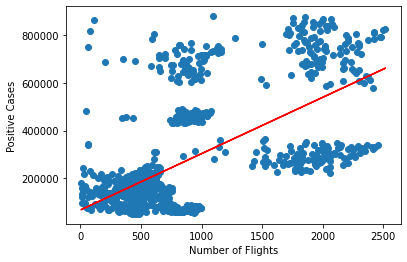

2.1904842049026554e-137

In [38]:
x_values = project_data_set_df['Number of Flights']
y_values = project_data_set_df['Positive']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Number of Flights')
plt.ylabel('Positive Cases')
plt.show()

pvalue

In [22]:
degree_freedom = len(project_data_set_df) - 1
confidence_level = 1 - pvalue


critical_value = stats.chi2.ppf(q = confidence_level, df = degree_freedom)
critical_value

1568.7149049268166

In [23]:
stats.chisquare(project_data_set_df['Number of Flights'], project_data_set_df['Positive'])

Power_divergenceResult(statistic=539720282.254292, pvalue=0.0)

In [39]:
ny_data_df = project_data_set_df.loc[(project_data_set_df['Month Abbr'] == 'Oct') & (project_data_set_df['State'] == 'New York')] 
ny_data_df

,Date,Month Abbr,State,Number of Flights,Positive,Deaths,Total Tested
734,2020-10-01,Oct,New York,1047,460031,25490,10856531
753,2020-10-02,Oct,New York,1043,461629,25497,10976024
772,2020-10-03,Oct,New York,953,463360,25505,11110291
791,2020-10-04,Oct,New York,1044,464582,25519,11220620
810,2020-10-05,Oct,New York,988,465515,25527,11297024
829,2020-10-06,Oct,New York,807,466908,25536,11393383
848,2020-10-07,Oct,New York,848,468268,25545,11501629
867,2020-10-08,Oct,New York,1028,470104,25555,11647440
886,2020-10-09,Oct,New York,1012,471696,25561,11786740
905,2020-10-10,Oct,New York,917,473143,25569,11921319


In [35]:
aggregation_functions = {'Number of Flights': 'sum', 'Month Abbr': 'first', 'State': 'first', 'Positive': 'first'}
ny_new_df = ny_data_df.groupby(ny_data_df['Date']).aggregate(aggregation_functions)
ny_new_df

,Number of Flights,Month Abbr,State,Positive
Date,,,,
2020-10-01,1047,Oct,New York,460031
2020-10-02,1043,Oct,New York,461629
2020-10-03,953,Oct,New York,463360
2020-10-04,1044,Oct,New York,464582
2020-10-05,988,Oct,New York,465515
2020-10-06,807,Oct,New York,466908
2020-10-07,848,Oct,New York,468268
2020-10-08,1028,Oct,New York,470104
2020-10-09,1012,Oct,New York,471696
